In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [14]:
df=pd.read_csv('Algerian_forestfires_cleaned.csv')

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df.drop(['day', 'month','year'], axis=1, inplace=True)

In [18]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [19]:

df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [20]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [21]:
X=df.drop('FWI', axis=1)
y=df['FWI']

In [22]:
X.head

<bound method NDFrame.head of      Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1

[243 rows x 11 columns]>

In [23]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [26]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

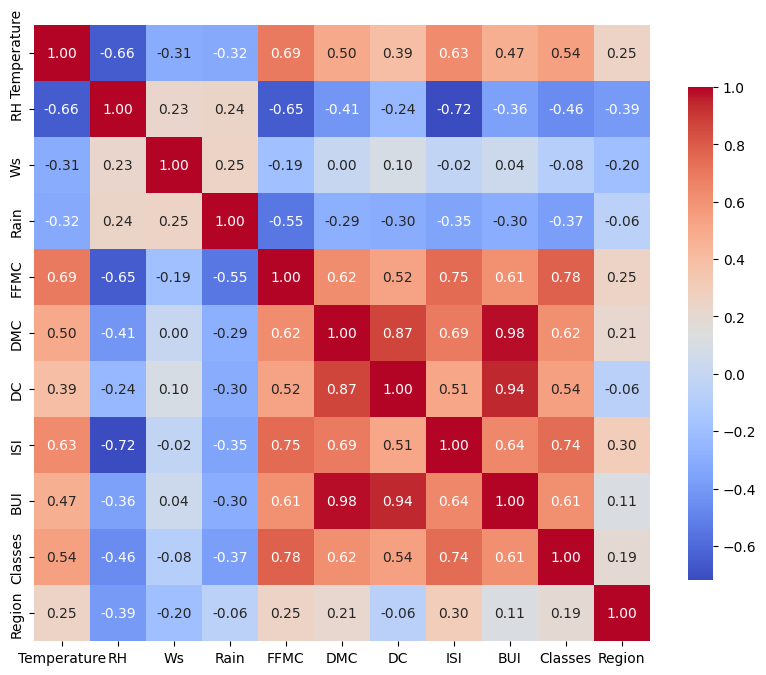

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [28]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [29]:
corr_feature=correlation(X_train,0.83)

In [30]:
X_train.drop(corr_feature, axis=1, inplace=True)
X_test.drop(corr_feature, axis=1, inplace=True)
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mean Absolute Error: 0.5468236465249978
R^2 Score: 0.9847657384266951


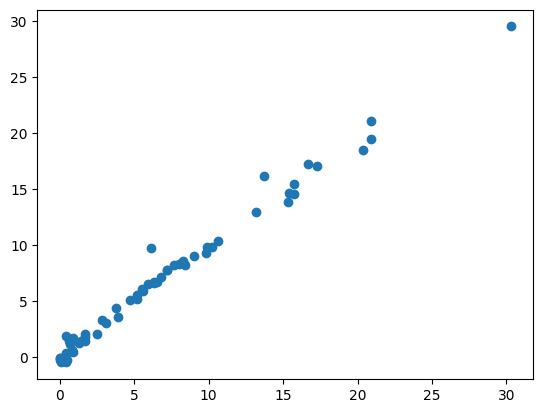

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr= LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
plt.scatter(y_test, y_pred)


Mean Absolute Error: 1.133175994914409
R^2 Score: 0.9492020263112388


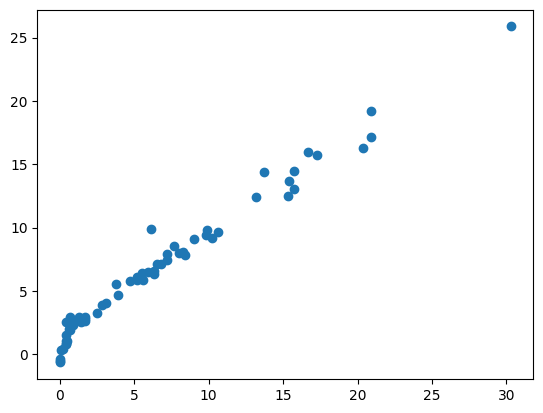

In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ls= Lasso()
ls.fit(X_train_scaled, y_train)
y_pred = ls.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
plt.scatter(y_test, y_pred)

Mean Absolute Error: 0.619970115826343
R^2 Score: 0.9820946715928275


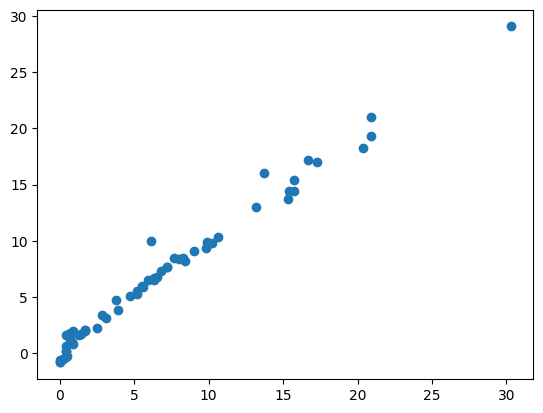

In [36]:
from sklearn.linear_model import LassoCV
lv=LassoCV(cv=5)
lv.fit(X_train_scaled, y_train)
y_pred = lv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.5642305340105715
R^2 Score: 0.9842993364555512


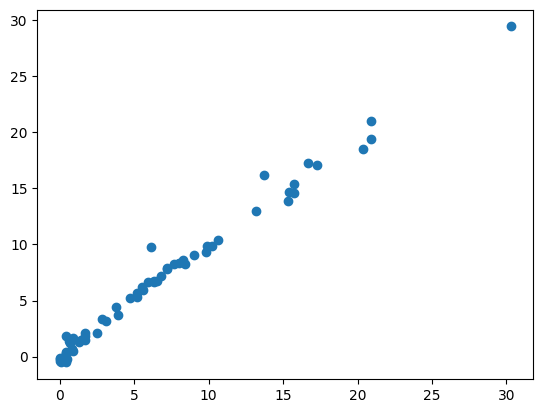

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rd= Ridge()
rd.fit(X_train_scaled, y_train)
y_pred = rd.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
plt.scatter(y_test, y_pred)

Mean Absolute Error: 0.5642305340105715
R^2 Score: 0.9842993364555512


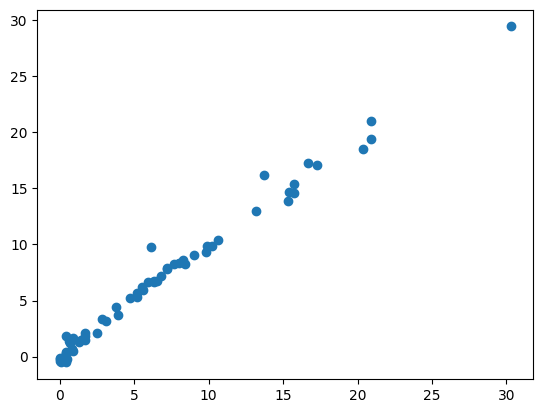

In [46]:
from sklearn.linear_model import RidgeCV
rv=RidgeCV(cv=5)
rv.fit(X_train_scaled, y_train)
y_pred = rv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

In [42]:
rv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean Absolute Error: 1.8822353634896005
R^2 Score: 0.8753460589519703


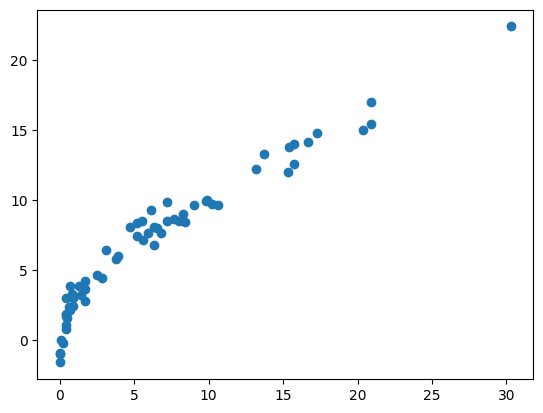

In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
en= ElasticNet()
en.fit(X_train_scaled, y_train)
y_pred = en.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
plt.scatter(y_test, y_pred)

Mean Absolute Error: 0.6575946731430898
R^2 Score: 0.9814217587854941


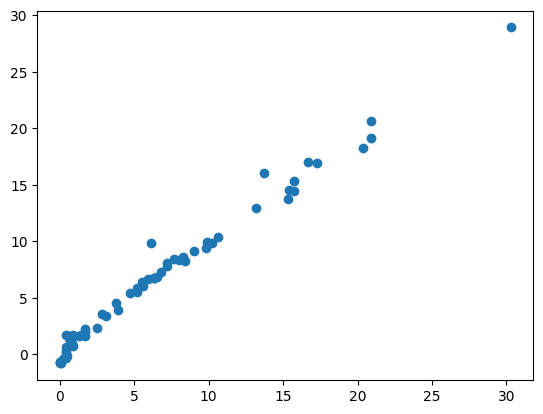

In [45]:
from sklearn.linear_model import ElasticNetCV
ev=ElasticNetCV(cv=5)
ev.fit(X_train_scaled, y_train)
y_pred = ev.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

In [47]:
import pickle
pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(lr, open('linear.pkl', 'wb'))